In [27]:
import sys
import pandas as pd

from sklearn import *

import pylab as plt



### Exercício Mnist

1. 786 colunas de características
2. coluna label identifica o número
3. crie um dataframe para representar a base mnist
4. crie um classificador de multiplas classes (usando a coluna label) como alvo
5. interprete o resultado
6. Qual valor (entre 0 a 9) o classificador teve mais sucesso em identificar?



In [3]:
mnist = pd.read_csv("mnist-in-csv/mnist_train.csv")
mnist_teste = pd.read_csv("mnist-in-csv/mnist_test.csv")

In [4]:
kernelMulti = linear_model.LogisticRegression(multi_class='auto')

In [5]:
res = mnist.label.astype(str)
mnist = mnist.drop(columns='label')

In [33]:
res_sub = res.loc[1:2000]
mnist_sub = mnist.loc[1:2000]

In [34]:
kernelMulti.fit(mnist_sub, res_sub)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
res_sub_test = res.loc[2000:4000:2]
mnist_sub_tes = mnist.loc[2000:4000:2]

In [36]:
res_predict = kernelMulti.predict(mnist_sub_tes)

In [37]:
print metrics.classification_report(res_predict, res_sub_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        86
           1       0.95      0.88      0.91       124
           2       0.81      0.78      0.79       107
           3       0.73      0.78      0.75        92
           4       0.68      0.76      0.72       105
           5       0.68      0.64      0.66        84
           6       0.90      0.93      0.92       101
           7       0.81      0.79      0.80       113
           8       0.66      0.75      0.70        84
           9       0.69      0.59      0.64       105

   micro avg       0.78      0.78      0.78      1001
   macro avg       0.78      0.78      0.78      1001
weighted avg       0.79      0.78      0.78      1001



In [38]:
print metrics.confusion_matrix(res_predict, res_sub_test)

[[ 79   0   2   1   0   2   1   0   0   1]
 [  0 109   1   1   0   1   1   3   4   4]
 [  2   1  83   5   5   1   2   4   2   2]
 [  0   1   3  72   2   9   0   1   3   1]
 [  0   1   4   2  80   6   2   1   6   3]
 [  2   0   0   8   2  54   3   0  11   4]
 [  2   0   1   0   3   0  94   1   0   0]
 [  0   2   0   6   3   1   0  89   2  10]
 [  2   1   7   2   2   2   1   1  63   3]
 [  1   0   2   2  21   3   0  10   4  62]]


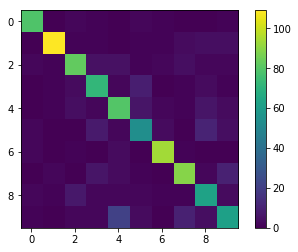

In [39]:
plt.imshow(metrics.confusion_matrix(res_predict, res_sub_test));

plt.colorbar();

ele consegue acertar uma faixa considerável, de acordo com a matriz de confusão, porém os falsos positivos para cada classe são consideráveis para a maior parte dos digitos. 

o dígito '1' teve melhor precisão para uma menor taxa de falsos negativos